In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

   time     x_acc     y_acc      z_acc
0     0  0.787961 -0.732876   9.998009
1     5  0.716111 -0.696951  10.047107
2    10  0.771196 -0.756826  10.140512
3    15  0.797542 -0.771196  10.075848
4    20  0.777184 -0.729283  10.168056


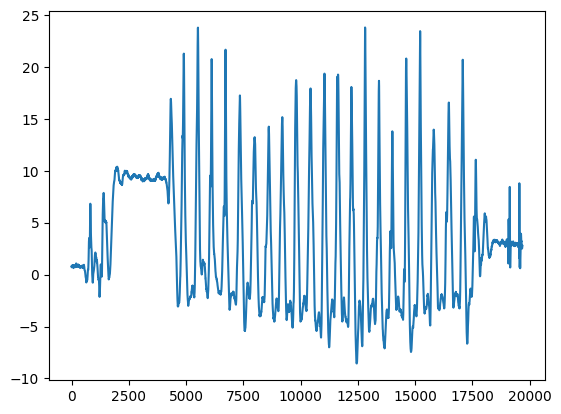

In [85]:
file = "./data/100bpm.csv"
# file = "./data/80bpm.csv"
# open csv file and read it into a pandas dataframe
df = pd.read_csv(file)
# label the columns
columns = ['time', 'tag1', 'tag2', 'x_acc', 'y_acc', 'z_acc']
df.columns = columns
# drop the tag columns
df = df.drop(['tag1', 'tag2'], axis=1)
# make the time indexed from 0
df['time'] = df['time'] - df['time'].iloc[0]
# print the head of the dataframe
print(df.head())
# plot the x acceleration
plt.plot(df['time'], df['x_acc'])


In [86]:
# perform fft on the x_acc column
x_acc_fft = np.fft.fft(df['x_acc'])
# find the frequency of the x_acceleration
x_acc_freq = np.fft.fftfreq(len(df['x_acc']), 0.05)

# find the point where the fft is the max
highest_freq_index = np.argmax(x_acc_fft)
# print the frequency at that point
print(x_acc_freq[highest_freq_index])

0.0
